In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")

/var/folders/4p/xsshwcpd61ddwg_493_fyfyw0000gn/T/ipykernel_1947/738466913.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")


In [3]:
df = df[['iyear', 'imonth', 'iday', 'extended', 'country', 'provstate', 'country_txt', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname',
         'weaptype1_txt']]
df.head()

,iyear,imonth,iday,extended,country,provstate,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
0,1970,7,2,0,58,NaN,Dominican Republic,1,Assassination,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,130,Federal,Mexico,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,160,Tarlac,Philippines,1,Assassination,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,78,Attica,Greece,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,101,Fukouka,Japan,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary


In [4]:
start_year = 2000
country = 'India'
df = df.loc[(df['iyear'] >= start_year) & (df['country_txt'] == country)]
df.head()

,iyear,imonth,iday,extended,country,provstate,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
69837,2000,1,1,0,92,Jammu and Kashmir,India,1,Armed Assault,Police,Lashkar-e-Taiba (LeT),Firearms
69841,2000,1,1,0,92,Assam,India,1,Bombing/Explosion,Utilities,United Liberation Front of Assam (ULFA),Explosives
69869,2000,1,3,0,92,Jammu and Kashmir,India,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives
69889,2000,1,6,0,92,Delhi,India,1,Bombing/Explosion,Transportation,Unknown,Explosives
69890,2000,1,7,0,92,Andhra Pradesh,India,1,Bombing/Explosion,Government (General),People's War Group (PWG),Explosives


In [5]:
count = df['gname'].value_counts()
count.head(21)

gname
Unknown                                                         3114
Communist Party of India - Maoist (CPI-Maoist)                  1877
Maoists                                                         1389
United Liberation Front of Assam (ULFA)                          303
Lashkar-e-Taiba (LeT)                                            179
Hizbul Mujahideen (HM)                                           179
Garo National Liberation Army                                    166
National Democratic Front of Bodoland (NDFB)                     151
National Socialist Council of Nagaland-Isak-Muivah (NSCN-IM)      89
People's Liberation Army (India)                                  75
People's Liberation Front of India                                67
Gorkha Janmukti Morcha (GJM)                                      67
National Liberation Front of Tripura (NLFT)                       65
People's War Group (PWG)                                          57
National Socialist Council o

In [6]:
num_names = 20
names = count.keys()[1:num_names+1]
names = list(names)
names

['Communist Party of India - Maoist (CPI-Maoist)',
 'Maoists',
 'United Liberation Front of Assam (ULFA)',
 'Lashkar-e-Taiba (LeT)',
 'Hizbul Mujahideen (HM)',
 'Garo National Liberation Army',
 'National Democratic Front of Bodoland (NDFB)',
 'National Socialist Council of Nagaland-Isak-Muivah (NSCN-IM)',
 "People's Liberation Army (India)",
 "People's Liberation Front of India",
 'Gorkha Janmukti Morcha (GJM)',
 'National Liberation Front of Tripura (NLFT)',
 "People's War Group (PWG)",
 'National Socialist Council of Nagaland-Khaplang (NSCN-K)',
 'Indian Mujahideen',
 'Kangleipak Communist Party (KCP)',
 'Separatists',
 'Naxalites',
 'Jaish-e-Mohammad (JeM)',
 'Muslim extremists']

In [7]:
countries = pd.get_dummies(df['country_txt'])
countries.reset_index(drop = True, inplace = True)

states = pd.get_dummies(df['provstate'])
states.reset_index(drop = True, inplace = True)

attacks = pd.get_dummies(df['attacktype1_txt'])
attacks.reset_index(drop = True, inplace = True)

targets = pd.get_dummies(df['targtype1_txt'])
targets.reset_index(drop = True, inplace = True)

weapons = pd.get_dummies(df['weaptype1_txt'])
weapons.reset_index(drop = True, inplace = True)

In [8]:
df.reset_index(drop=True, inplace=True)
df_dummies = pd.concat([df, countries, states, attacks, targets, weapons], axis = 1)

In [9]:
df_dummies = df_dummies.drop(['country','imonth', 'iday', 'country_txt',
                              'provstate', 'attacktype1_txt','targtype1_txt',
                              'weaptype1_txt'],
                             axis = 1)
df_dummies.head()

,iyear,extended,success,gname,India,Andhra Pradesh,Andhra pradesh,Arunachal Pradesh,Assam,Bihar,...,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,2000,0,1,Lashkar-e-Taiba (LeT),True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,2000,0,1,United Liberation Front of Assam (ULFA),True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,2000,0,1,Unknown,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2000,0,1,Unknown,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2000,0,1,People's War Group (PWG),True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [10]:
unknown = df[df['gname'] == 'Unknown']
unknown.head()

,iyear,imonth,iday,extended,country,provstate,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
2,2000,1,3,0,92,Jammu and Kashmir,India,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives
3,2000,1,6,0,92,Delhi,India,1,Bombing/Explosion,Transportation,Unknown,Explosives
9,2000,1,19,0,92,Assam,India,1,Bombing/Explosion,Transportation,Unknown,Explosives
11,2000,1,26,0,92,Jammu and Kashmir,India,0,Assassination,Government (General),Unknown,Explosives
12,2000,1,27,0,92,Jammu and Kashmir,India,1,Bombing/Explosion,Government (General),Unknown,Explosives


In [11]:
df_dummies = df_dummies.loc[(df_dummies['gname'] != 'Unknown') & (df_dummies['gname'].isin(names))]
df_dummies.head()

,iyear,extended,success,gname,India,Andhra Pradesh,Andhra pradesh,Arunachal Pradesh,Assam,Bihar,...,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,2000,0,1,Lashkar-e-Taiba (LeT),True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,2000,0,1,United Liberation Front of Assam (ULFA),True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,2000,0,1,People's War Group (PWG),True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,2000,0,1,People's War Group (PWG),True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,2000,0,1,Lashkar-e-Taiba (LeT),True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [12]:
x=df_dummies.loc[:,~df_dummies.columns.isin(['gname'])].values
y=df_dummies.loc[:,'gname'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3460, 78)
(1484, 78)
(3460,)
(1484,)


In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

In [17]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import time
import warnings
warnings.filterwarnings('ignore')

# KNeighbors Classifier

In [18]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50], 'weights': ['uniform','distance']}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

In [19]:
start_time = time.time()

grid_knn.fit(x_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ", grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test_std,y_test))

end_time = time.time()
run_time = end_time - start_time
print('Runtime of the Grid Search for the KNeighbors Algorithm: {:.5f}s'.format(run_time))

Best Score ==>  0.719364161849711
Tuned Paramerers ==>  {'n_neighbors': 25, 'weights': 'distance'}
Accuracy on Train set ==>  0.9280346820809249
Accuracy on Test set ==>  0.7405660377358491
Runtime of the Grid Search for the KNeighbors Algorithm: 2.48218s


In [20]:
start_time = time.time()

knn = KNeighborsClassifier(**grid_knn.best_params_)
knn.fit(x_train_std, y_train)

print("Accuracy on Train set ==> ", knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", knn.score(x_test_std,y_test))

end_time = time.time()
kn_run_time = end_time - start_time

print('Runtime of the KNeighbors Classifier Algorithm: {:.5f}s'.format(kn_run_time))

Accuracy on Train set ==>  0.9280346820809249
Accuracy on Test set ==>  0.7405660377358491
Runtime of the KNeighbors Classifier Algorithm: 0.10574s


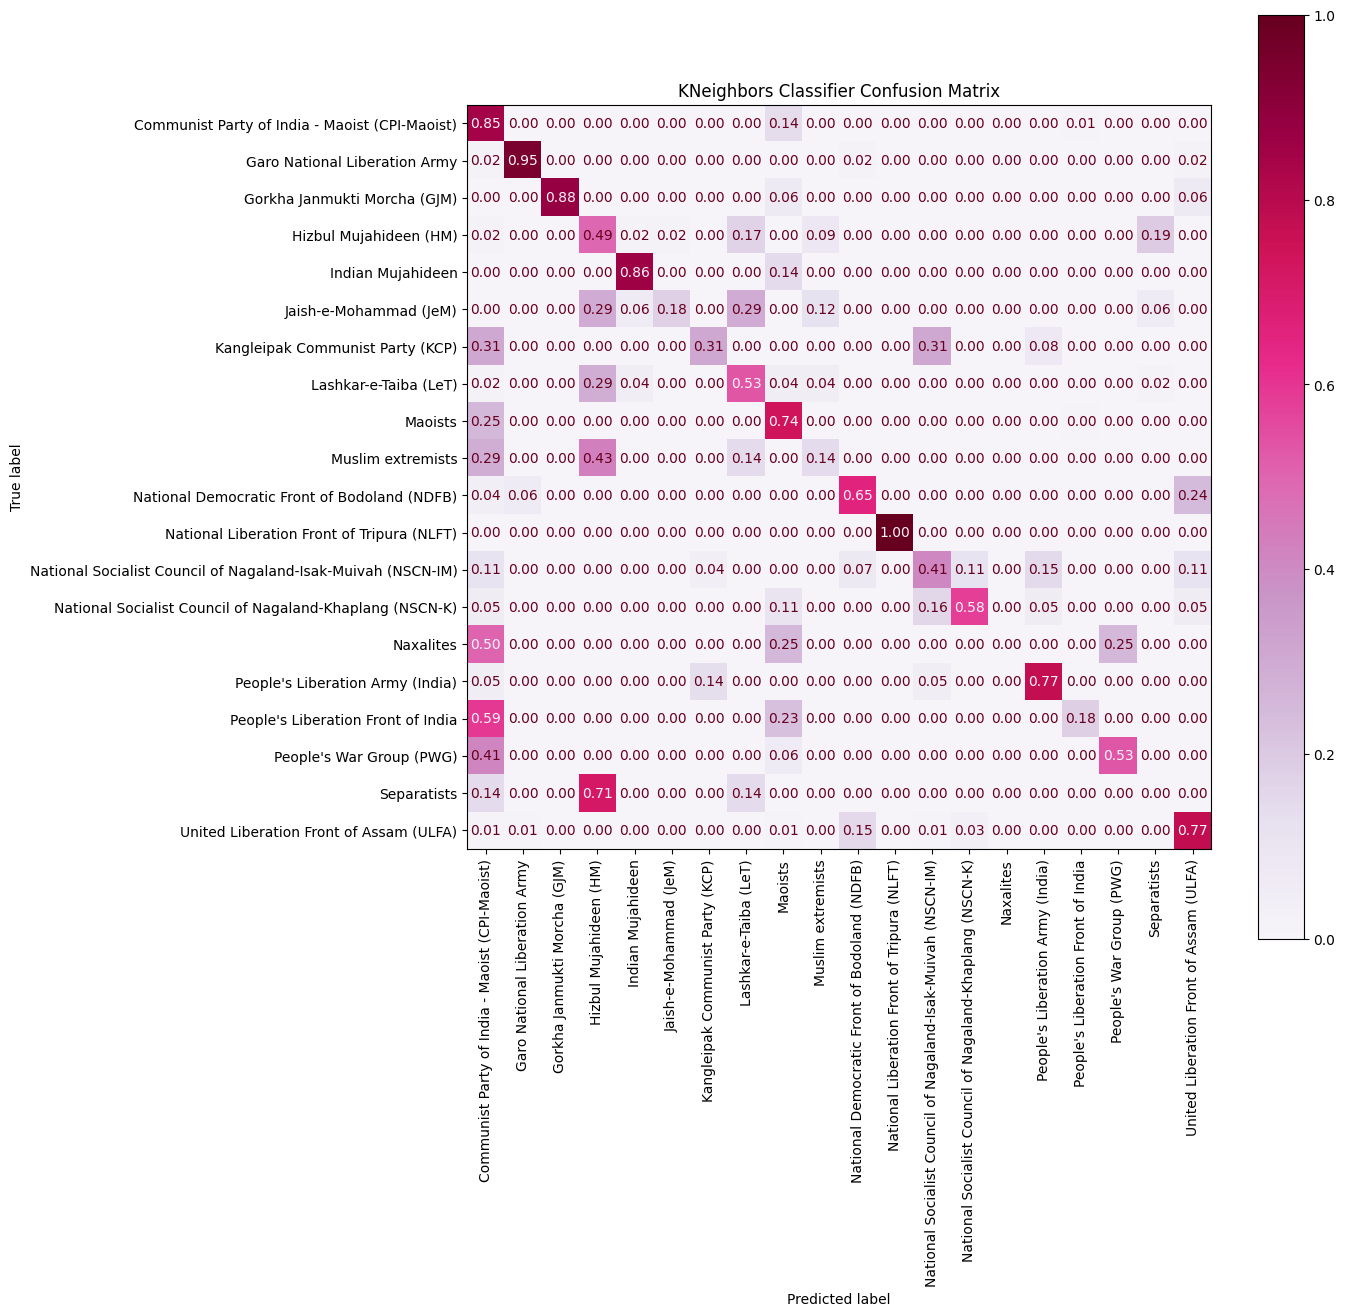

In [22]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = ConfusionMatrixDisplay.from_estimator(knn, x_test_std, y_test, ax=ax, xticks_rotation='vertical',
                                               cmap='PuRd', normalize='true', values_format='.2f')

plt.title('KNeighbors Classifier Confusion Matrix')
plt.show()

In [23]:
knn_acc=print("Accuracy on Test set using KNeighbors: {:.4%}".format(knn.score(x_test_std,y_test)))
knn_rt=print('Runtime of the KNeighbors Classifier Algorithm: {:.4f}s'.format(kn_run_time))

Accuracy on Test set using KNeighbors: 74.0566%
Runtime of the KNeighbors Classifier Algorithm: 0.1057s


# Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'min_samples_leaf':[1, 2, 3, 4, 5, 10, 25, 50],'max_depth':np.arange(2, 10)}

grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [26]:
import time
start_time = time.time()

grid_dtc.fit(x_train, y_train)
print("Best Score ==> ", grid_dtc.best_score_)
print("Tuned Paramerers ==> ", grid_dtc.best_params_)
print("Accuracy on Train set ==> ", grid_dtc.score(x_train,y_train))
print("Accuracy on Test set ==> ", grid_dtc.score(x_test,y_test))

end_time = time.time()
run_time = end_time - start_time
print('Runtime of the Grid Search for the Decision Tree Algorithm: {:.5f}s'.format(run_time))

Best Score ==>  0.7537572254335261
Tuned Paramerers ==>  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4}
Accuracy on Train set ==>  0.7898843930635838
Accuracy on Test set ==>  0.7796495956873315
Runtime of the Grid Search for the Decision Tree Algorithm: 23.64696s


In [27]:
start_time = time.time()

dtc = DecisionTreeClassifier(**grid_dtc.best_params_, random_state=42)
dtc.fit(x_train, y_train)

print("Accuracy on Train set ==> ", dtc.score(x_train,y_train))
print("Accuracy on Test set ==> ", dtc.score(x_test,y_test))

end_time = time.time()
dtc_run_time = end_time - start_time

print('Runtime of the Decision Tree Classifier Algorithm: {:.5f}s'.format(dtc_run_time))

Accuracy on Train set ==>  0.7904624277456648
Accuracy on Test set ==>  0.7803234501347709
Runtime of the Decision Tree Classifier Algorithm: 0.04172s


In [28]:
features = df_dummies.loc[:,~df_dummies.columns.isin(['gname'])].columns
classes = df_dummies['gname'].unique()
classes.sort()

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(28, 16))
plt.tight_layout()
tree.plot_tree(dtc, ax=ax, feature_names=features, class_names=classes, max_depth=2, filled=True, fontsize=17, rounded=True)
ax.set_title('Decision Tree')

# Show the plot
plt.show()

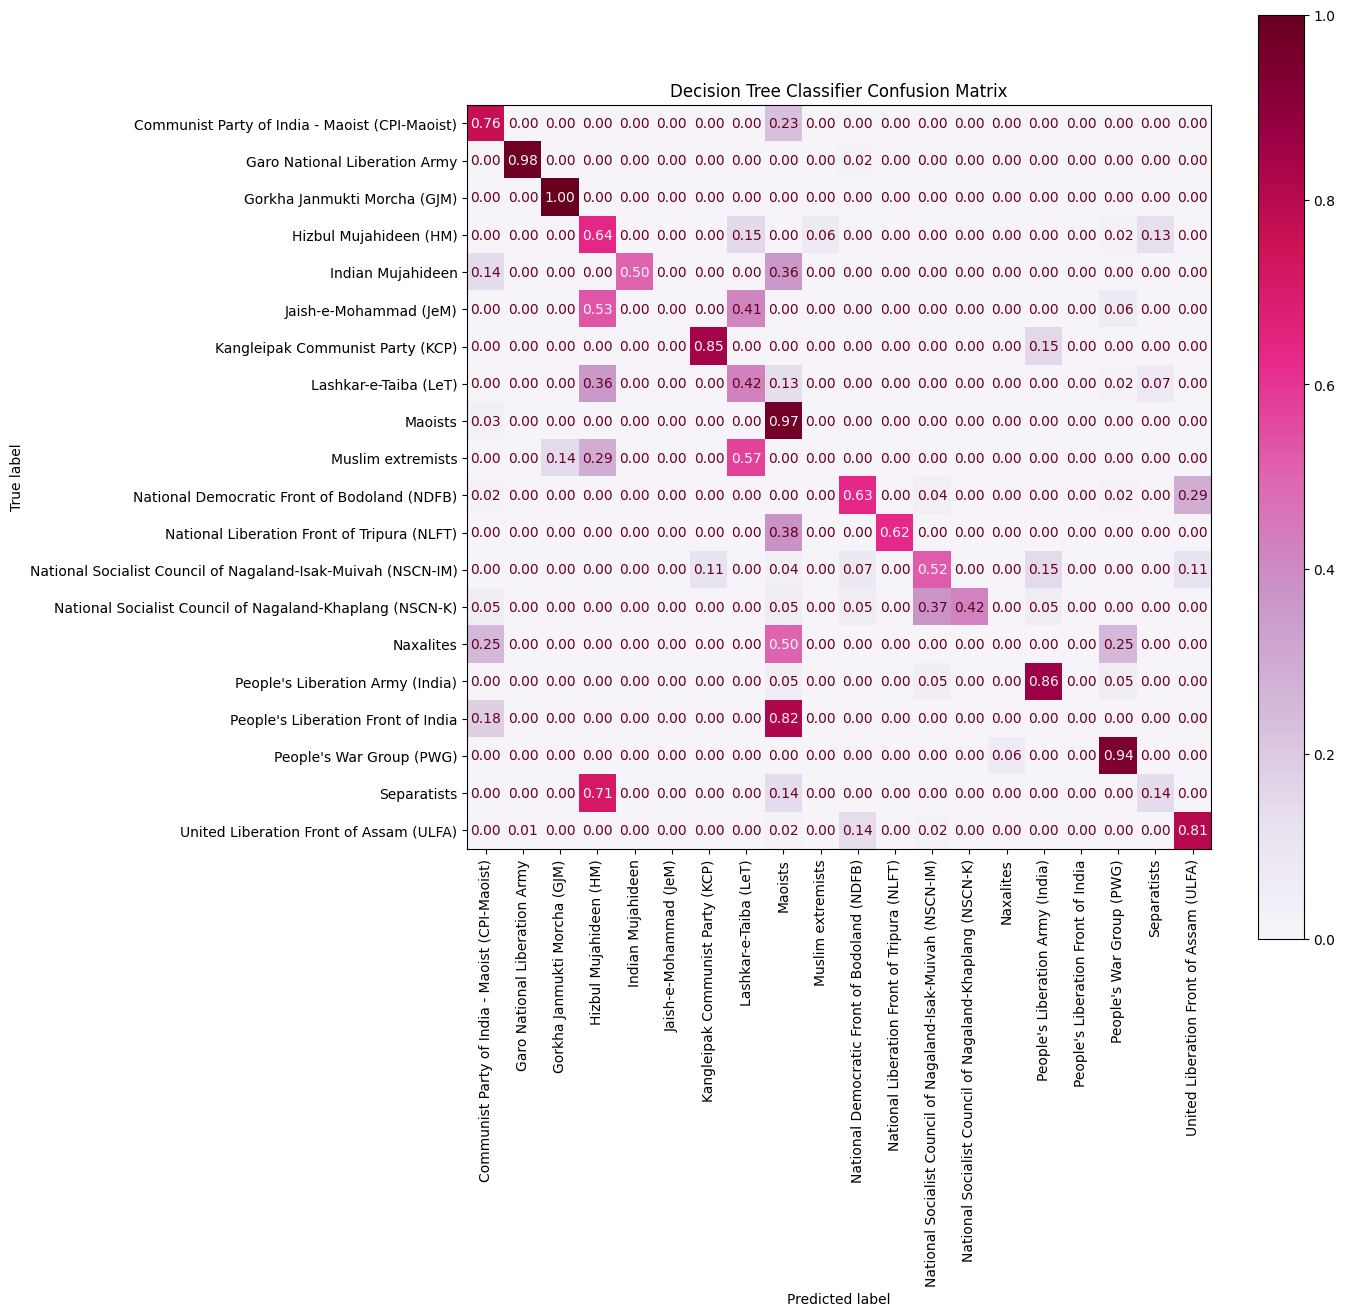

In [34]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = ConfusionMatrixDisplay.from_estimator(dtc, x_test, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

In [35]:
dtc_acc=print("Accuracy on Test set using Decision Trees: {:.4%}".format(dtc.score(x_test,y_test)))
dtc_rt=print('Runtime of the Decision Tree Classifier Algorithm: {:.4f}s'.format(dtc_run_time))

Accuracy on Test set using Decision Trees: 78.0323%
Runtime of the Decision Tree Classifier Algorithm: 0.0417s


Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
start_time = time.time()

nb = GaussianNB()
nb.fit(x_train, y_train)

print("Accuracy on Train set ==> ", nb.score(x_train,y_train))
print("Accuracy on Test set ==> ", nb.score(x_test,y_test))

end_time = time.time()
nb_run_time = end_time - start_time

print('Runtime of the Naive Bayes Algorithm: {:.5f}s'.format(nb_run_time))

Accuracy on Train set ==>  0.20895953757225433
Accuracy on Test set ==>  0.192722371967655
Runtime of the Naive Bayes Algorithm: 0.06707s


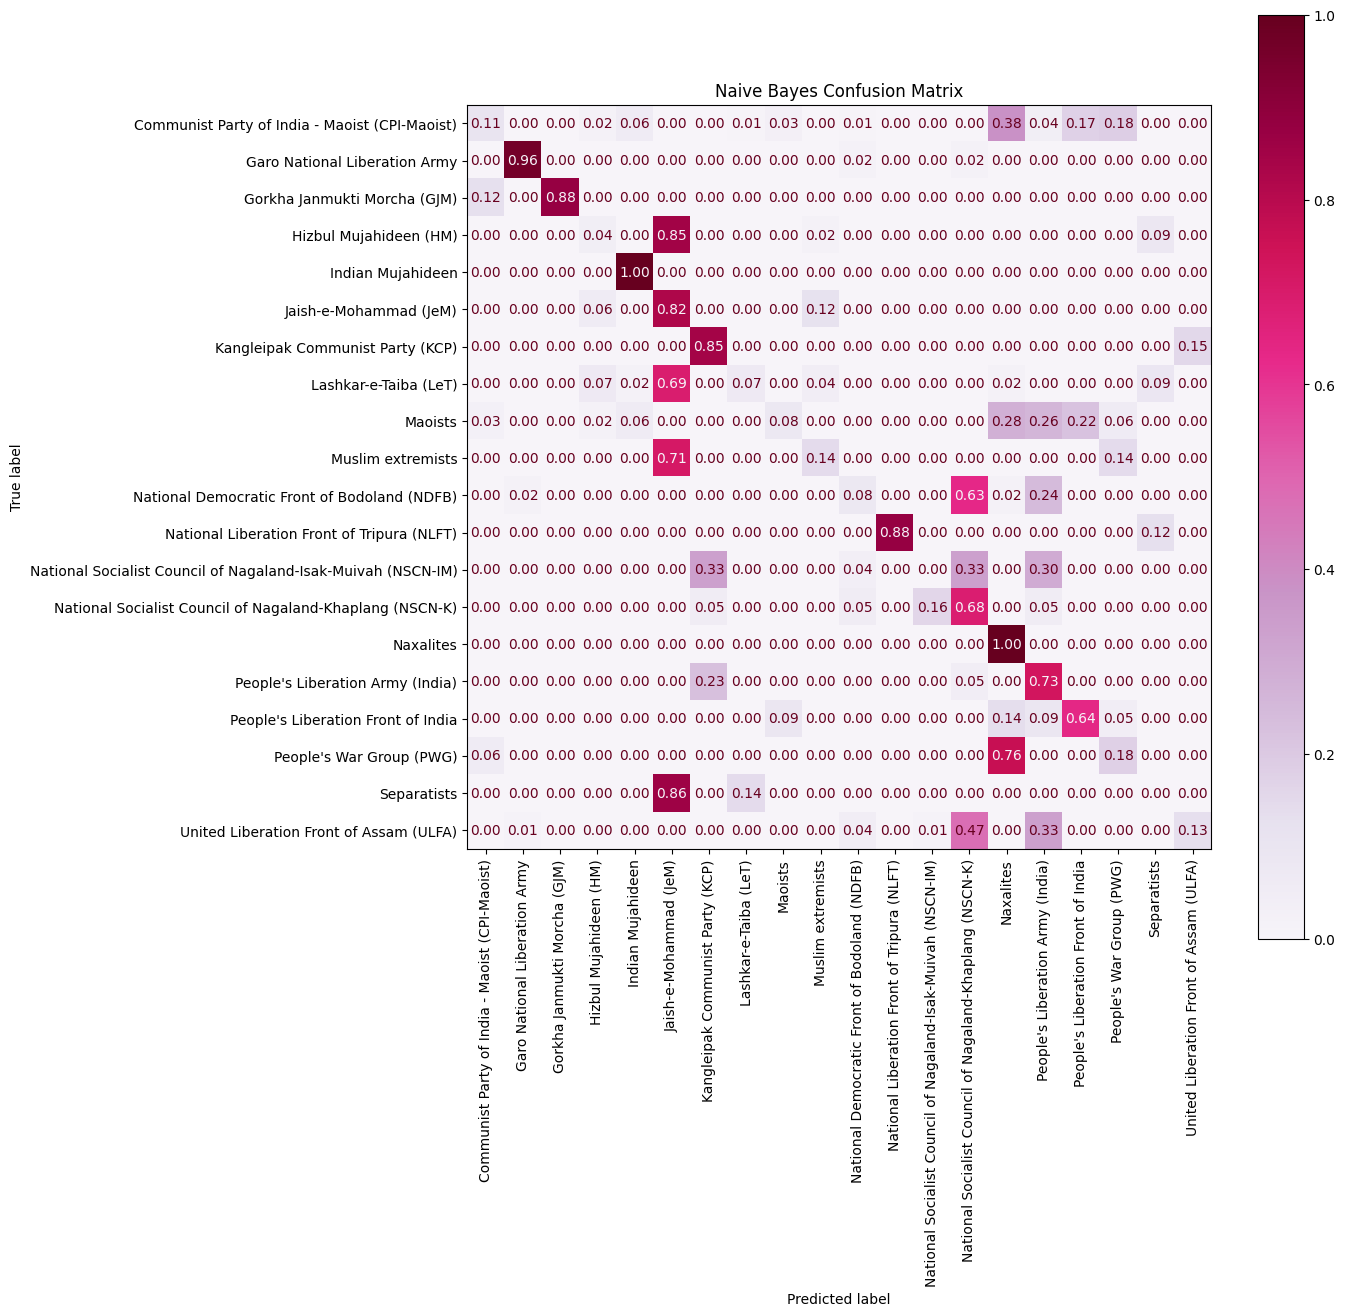

In [39]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [40]:
nb_acc=print("Accuracy on Test set using Naive Bayes: {:.4%}".format(nb.score(x_test,y_test)))
nb_rt=print('Runtime of the Naive Bayes Algorithm: {:.4f}s'.format(nb_run_time))

Accuracy on Test set using Naive Bayes: 19.2722%
Runtime of the Naive Bayes Algorithm: 0.0671s


# Neural Network

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(40,40,40), max_iter=300, random_state=42)
mlp.fit(x_train_std, y_train)

print("Accuracy on Train set ==> ", mlp.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", mlp.score(x_test_std,y_test))

end_time = time.time()
mlp_run_time = end_time - start_time

print('Runtime of the Neural Network: {:.5f}s'.format(mlp_run_time))

Accuracy on Train set ==>  0.8994219653179191
Accuracy on Test set ==>  0.7580862533692723
Runtime of the Neural Network: 15.72825s


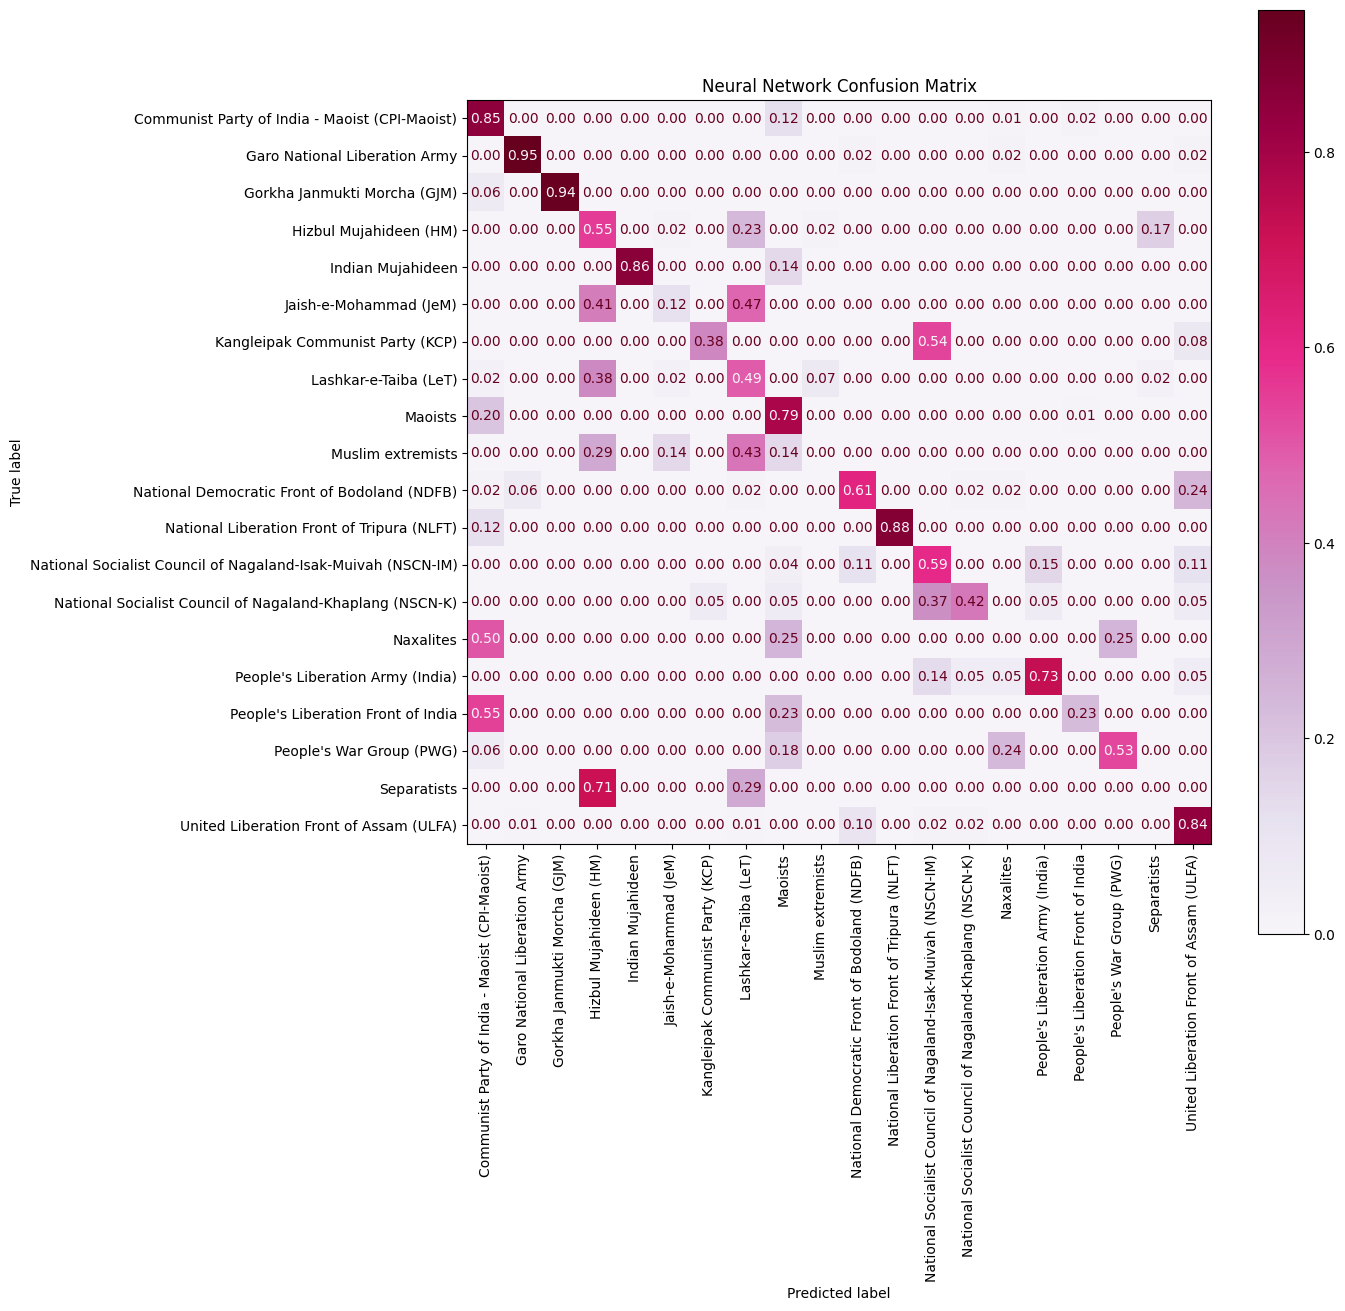

In [43]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = ConfusionMatrixDisplay.from_estimator(mlp, x_test_std, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('Neural Network Confusion Matrix')
plt.show()

In [44]:
nn_acc=print("Accuracy on Test set using Neural Network: {:.4%}".format(mlp.score(x_test_std,y_test)))
nn_rt=print('Runtime of the Neural Network: {:.4f}s'.format(mlp_run_time))

Accuracy on Test set using Neural Network: 75.8086%
Runtime of the Neural Network: 15.7282s


k-means

In [45]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import scale, robust_scale

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('coolwarm')
sns.set_color_codes('bright')

In [47]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')

In [48]:
data = data[data['nkill'] <= 4].reset_index(drop=True)
data = data[data['nwound'] <= 7].reset_index(drop=True)

In [51]:
features = [
    'longitude',
    'latitude',

    'nwound',
    'nkill',

    'natlty1_txt',
    'targtype1_txt',
    'targsubtype1_txt',
    'weaptype1_txt',
    'attacktype1_txt',
]

X = pd.get_dummies(data[features])
X = X.T[X.var() > 0.05].T.fillna(0)
X = X.fillna(0)

print('Shape:', X.shape)
X.head()

Shape: (139435, 24)


,longitude,latitude,nwound,nkill,natlty1_txt_Afghanistan,natlty1_txt_India,natlty1_txt_Iraq,natlty1_txt_Pakistan,targtype1_txt_Business,targtype1_txt_Government (General),...,targsubtype1_txt_Unnamed Civilian/Unspecified,weaptype1_txt_Explosives,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,weaptype1_txt_Unknown,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,attacktype1_txt_Facility/Infrastructure Attack,attacktype1_txt_Hostage Taking (Kidnapping)
0,-69.951164,18.456792,0.0,1.0,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,-99.086624,19.371887,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,120.599741,15.478598,0.0,1.0,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,-89.176269,37.005105,0.0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,-56.187214,-34.891151,0.0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


2, 3, 4, 5, 6, 7, 8, 9, 10, 

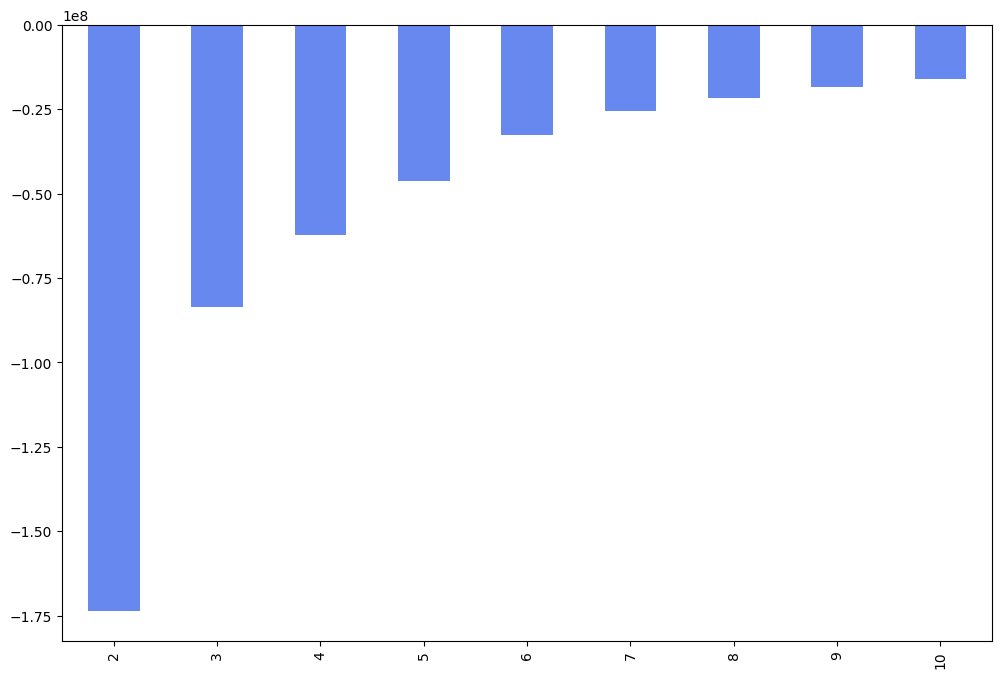

In [52]:
scores = {}
for k in range(2, 11):
    print(k, end=', ')
    scores[k] = KMeans(n_clusters=k).fit(X).score(X)
_ = pd.Series(scores).plot.bar()

In [53]:
data['Cluster'] = KMeans(n_clusters=6).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, data['Cluster'], sample_size=10000) * 10000 // 1 / 100, '%')

Silhouette Score: 58.83 %


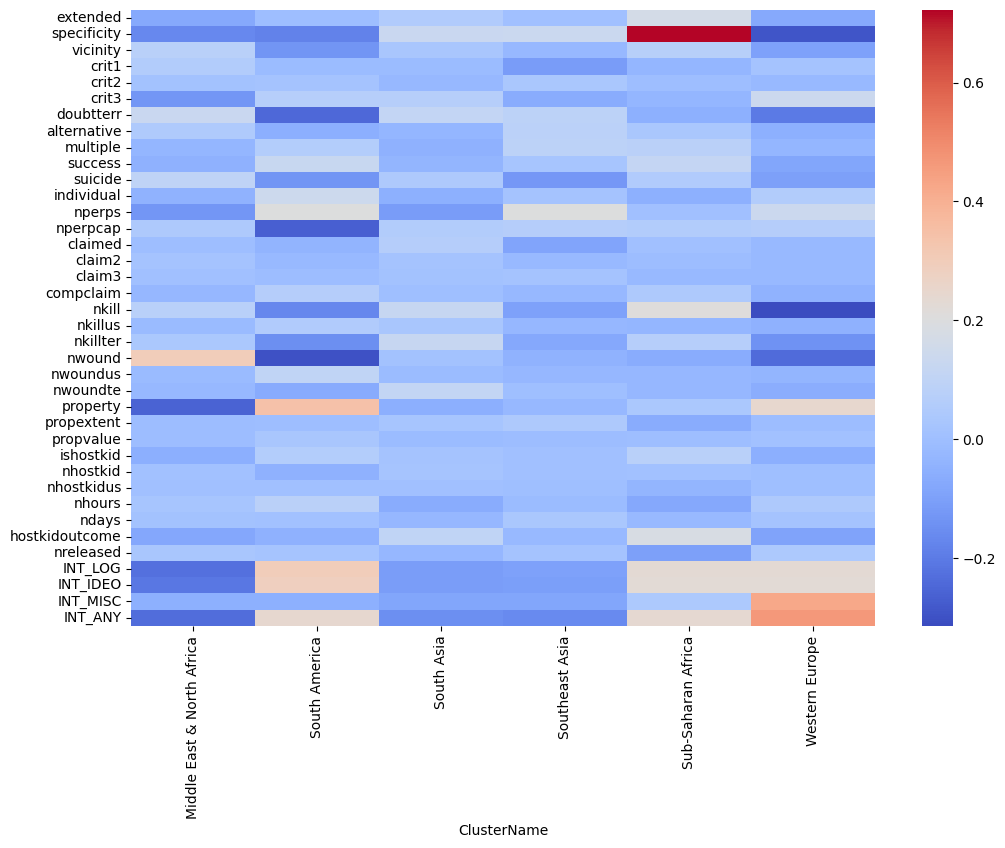

In [54]:
names = data.groupby('Cluster')['region_txt'].describe()['top'].values
data['ClusterName'] = data['Cluster'].apply(lambda c: names[c - 1])

numerical = data.dtypes[data.dtypes != 'object'].keys()
exclude = [
    'eventid', 'Cluster', 'region', 'country', 'iyear',
    'natlty1', 'natlty2', 'natlty3', 'imonth', 'iday',
    'guncertain1', 'guncertain2', 'guncertain3'
] + [col for col in numerical if 'type' in col or 'mode' in col or 'ransom' in col]
X_profiling = data[numerical.drop(exclude)].fillna(0)
X_profiling = pd.DataFrame(scale(X_profiling), columns=X_profiling.columns)
X_profiling['ClusterName'] = data['ClusterName']
_ = sns.heatmap(X_profiling.groupby('ClusterName').mean().drop(['longitude', 'latitude'], axis=1).T,
               cmap='coolwarm')

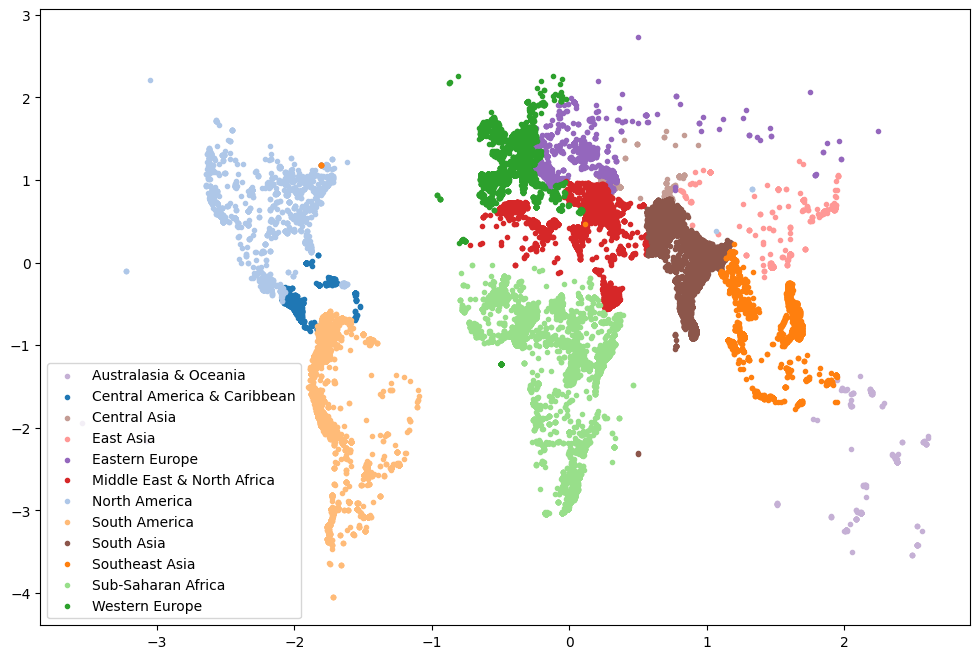

In [55]:
ckeys = data['region_txt'].unique()
ckeys = dict(zip(ckeys, plt.cm.tab20(range(len(ckeys)))))

for i, x in pd.concat([X_profiling, data['region_txt']], axis=1).groupby('region_txt'):
    _ = plt.scatter(x['longitude'], x['latitude'], c=ckeys[i], marker='.', cmap='tab10', label=i)
_ = plt.legend(loc=3)

In [56]:
kmeans_acc=print('Accuracy of the model:',
      len(data[data['region_txt'] == data['ClusterName']]) / len(data) * 10000 // 1 / 100, '%')

Accuracy of the model: 83.87 %


In [57]:
end_time = time.time()
scores_run_time = end_time - start_time

kmeans_rt=print('Runtime of the KMeans Algorithm: {:.5f}s'.format(scores_run_time))

Runtime of the KMeans Algorithm: 149.65870s
